In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 9.1 matplotlib

### 9.1.1 figure & 서브플롯

> * plt.figure : 새로운 피겨 생성
* figsize : 만들려는 피겨의 크기 & 비율 지정
* add_subplot : 그래프를 그리기 위한 최소 하나 이상의 subplot 생성

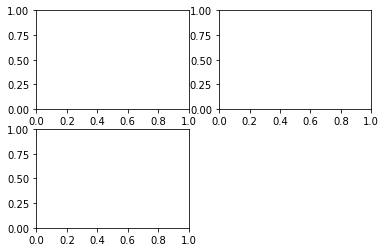

In [7]:
# 그래프를 위한 새로운 figure 생성
fig = plt.figure()

# subplots 생성
ax1 = fig.add_subplot(2,2,1)  # 2*2 크기의 4개 서브플롯 중 첫 번째 선택
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

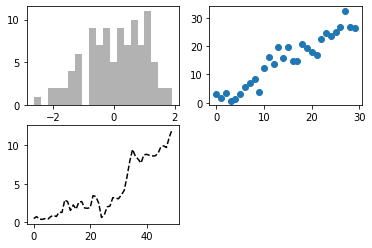

In [15]:
# 그래프를 위한 새로운 figure 생성
fig = plt.figure()

# subplots 생성
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 가장 최근 figure와 subplot에 그래프 그림
plt.plot(np.random.randn(50).cumsum(), 'k--') #'k--' : 스타일 옵션 (점선)


# 다른 빈 서브플롯에 그래프 직접 그리기
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

> * plt.subplots : NumPy 배열 & subplots 객체를 새로 생성하여 반환

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245028AEAC8>,
      dtype=object)

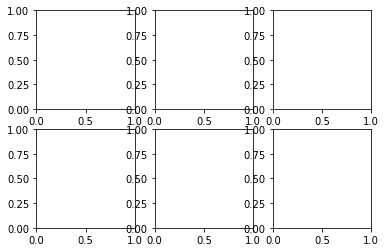

In [16]:
fig, axes = plt.subplots(2,3)

axes

#### 서브플롯 간의 간격 조절
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

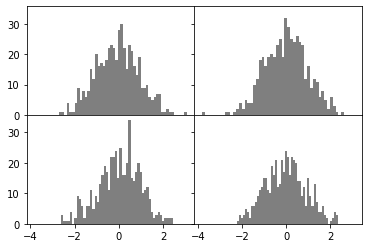

In [19]:
fig, axes = plt.subplots(2 ,2, sharex=True, sharey=True)  #같은 x축,y축

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
#서브플롯 간 간격 위해 figure의 너비, 높이 비율 조절
plt.subplots_adjust(wspace=0, hspace=0) 

### 9.1.2 색상, 마커, 선 스타일

__예시__ x 와 y 좌표값 배열에 녹색 점선 plot : ax.plot(x, y, linestyle='--', color='g')

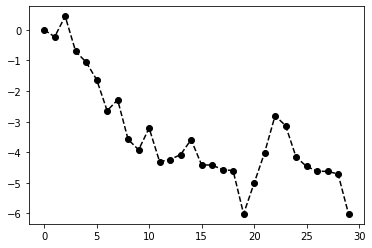

In [23]:
# 마커 추가
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

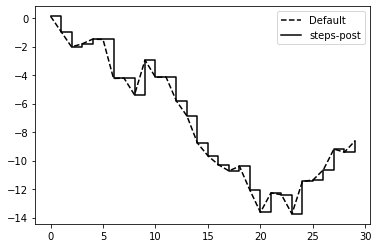

In [26]:
# drawstyle 이용

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')

### 9.1.3 눈금, 라벨, 범례
#### 제목, 축 이름, 눈금, 눈금 이름

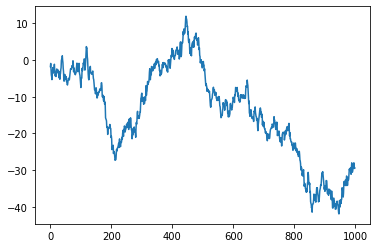

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

> x축 눈금 변경  
* set_xticks : 전체 데이터 범위 따라 눈금 배치 지정 (기본값)
* set_xticklabels : 다른 눈금 이름 지정

Text(0.5, 0, 'Stages')

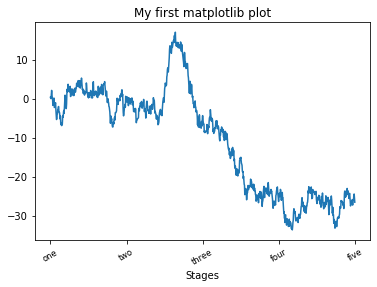

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

props = {  
    \'title': 'My first matplotlib plot',  
    'xlabel': 'Stages'  
}  
ax.set(**props)

#### 범례 추가
> __label = '범례'__  
범례에서 제외 : label='\_nolegend_'
* ax.legend( ), plt.legend( ) : 자동으로 범례 생성
* loc : 범례 위치 지정

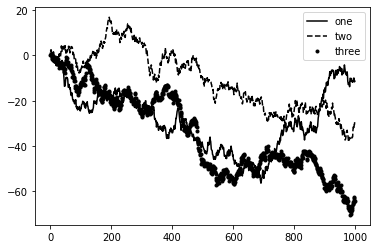

In [32]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### 9.1.4 주석에서 그림 추가
  
중요한 날짜를 추석으로 추가

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

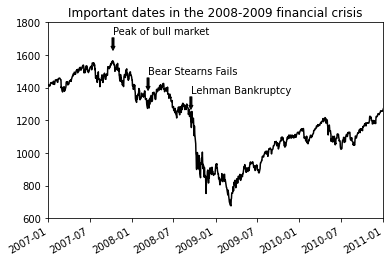

In [33]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

## x, y 좌표로 지정한 위치에 라벨 추가
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
## 그래프의 시작 & 끝 지정
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

## 그래프 제목
ax.set_title('Important dates in the 2008-2009 financial crisis')

> 도형추가 : ax.add_patch (모양)

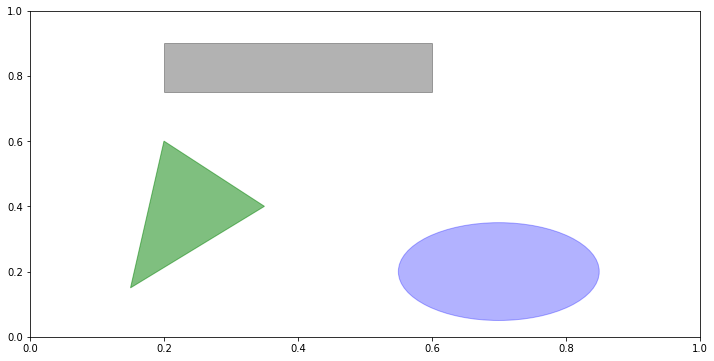

In [34]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 그래프를 파일로 저장
> * __plt.savefig__ ('figpath.svg')
  
### 9.1.6 matplotlib 설정
> figure 크기 10x10 으로 전역 설정 : __plt . rc__ ( ' figure ' , figsize = ( 10,10 ) )

***
## 9.2 pandas - seaborn으로 그래프 그리기
  
### 9.2.1 선그래프
> plot() : 기본적으로 선그래프 생성

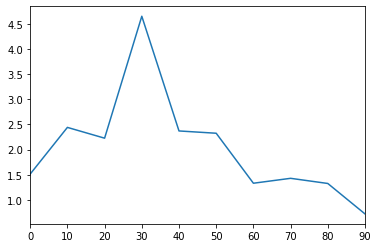

In [35]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()

> * use_index = False : 색인을 그래프의 축으로 사용하는 것 방지
* 축의 눈금 조절 : xticks, yticks
* 축의 한계 설정 : xlim, ylim
  
> DataFrame의 plot : 하나의 서브플럿 안에 각 column 별로 선그래프 & 범례 생성

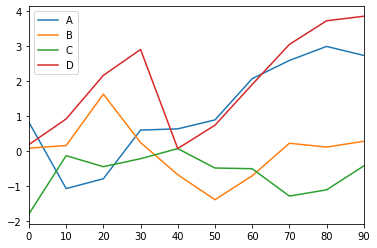

In [36]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 9.2.2 막대그래프
> * plot.bar ( ) : 수직막대그래프
    * 색인 = x 눈금
* plot.barh ( ) : 수평막대그래프
    * 색인 = y 눈금

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matpl

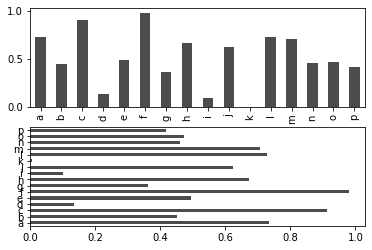

In [37]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

 각 row 값을 묶어서 하나의 그룹마다 각가의 막대 plot

In [39]:
np.random.seed(12348)


df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


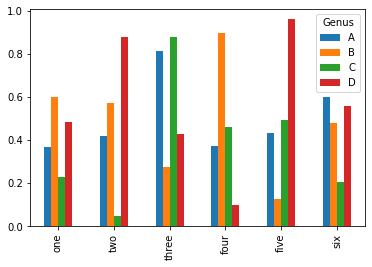

In [40]:
df.plot.bar()

> * stacked = True : 누적 막대 그래프

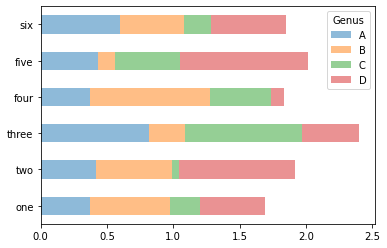

In [41]:
df.plot.barh(stacked=True, alpha=0.5)

__팁 dataset__  
: 요일별 파티 숫자 추출 & 파티 숫자 대비 팁 비율 - 막대그래프

In [42]:
# dataset
tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts


size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
# 1인 & 6인 파티 제외
party_counts = party_counts.loc[:, 2:5]


# 합 = 1 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


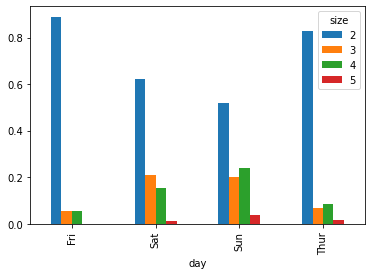

In [44]:
# 요일별 파티 규모
party_pcts.plot.bar()

* Seaborn 패키지 이용

In [45]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


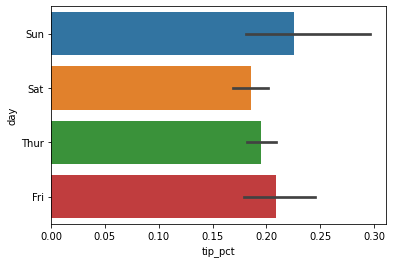

In [46]:
# 요일별 팁 비율 그래프 - 에러 막대 포함 (95% 신뢰구간)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

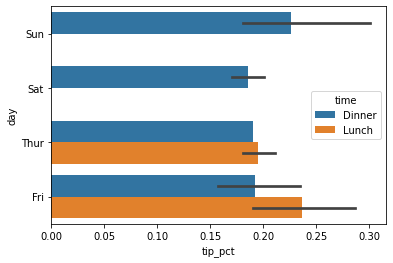

In [47]:
# 요일 & 시간별 팁 분류
## hue : 추가 분류 plot
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 9.2.3 히스토그램 & 밀도 그래프
> * 히스토그램 : plot.hist ( bins = 지정)
* 밀도그래프 : plot.density ( )

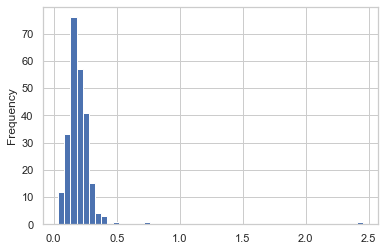

In [48]:
sns.set(style="whitegrid")

# 히스토그램
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

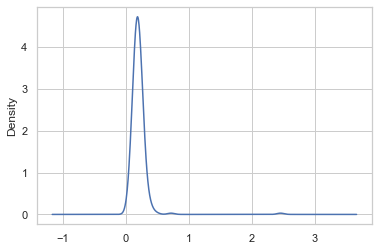

In [49]:
# 밀도 그래프
plt.figure()
tips['tip_pct'].plot.density()

> * distplot : 히스토그램 & 밀도 그래프 한번에

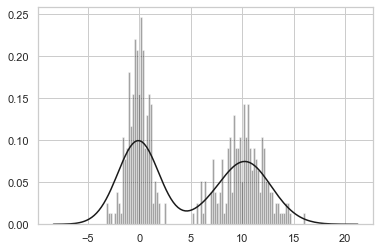

In [50]:
plt.figure()

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

### 9.2.4 산포도 scatter plot
1차원 데이터 묶음 간의 관계  
  
__예시__  
: 몇 가지 변수 선택 후 로그차 구하기

In [51]:
# dataset
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

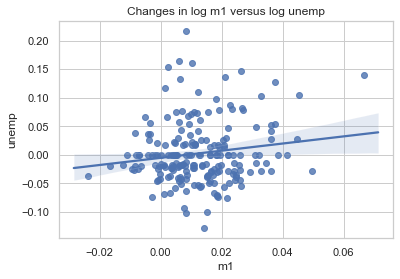

In [52]:
# regplot : 산포도 + 선형회귀곡선
plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

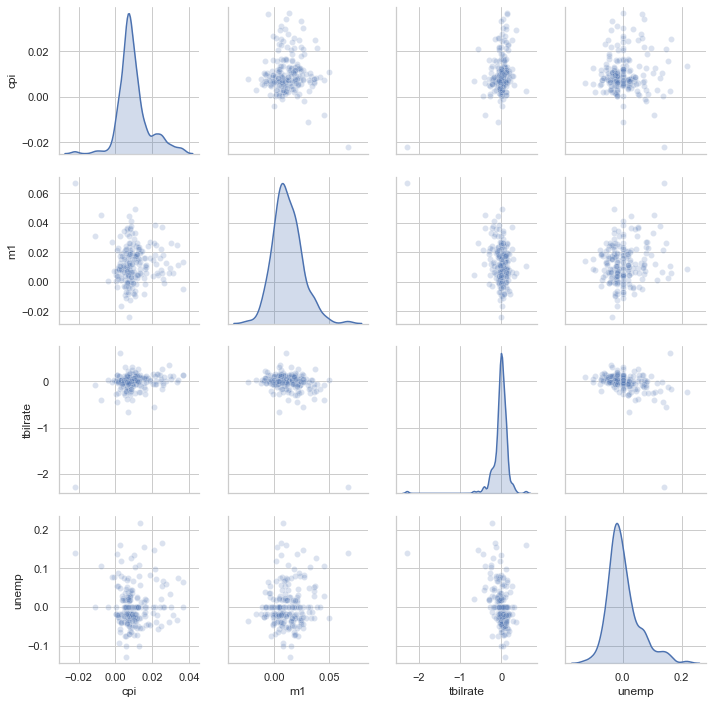

In [53]:
# pairplot : 산포도 행렬
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 패싯 그리드 & 범주형 데이터
__패싯 그리드__ : 다양한 범주형 값 가지는 데이터 시각화  
> * factorplot

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


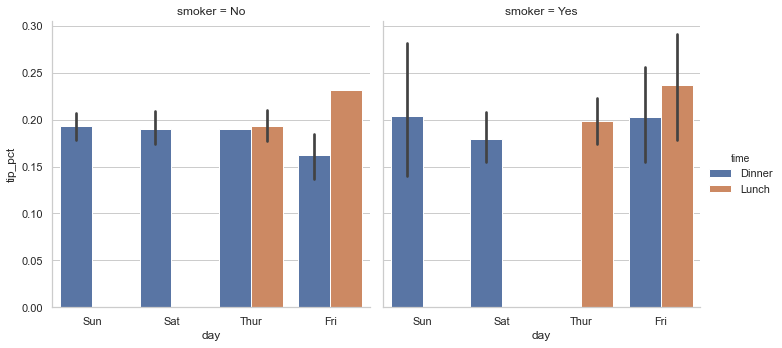

In [54]:
# 요일/시간/흡연여부에 따른 팁 비율

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

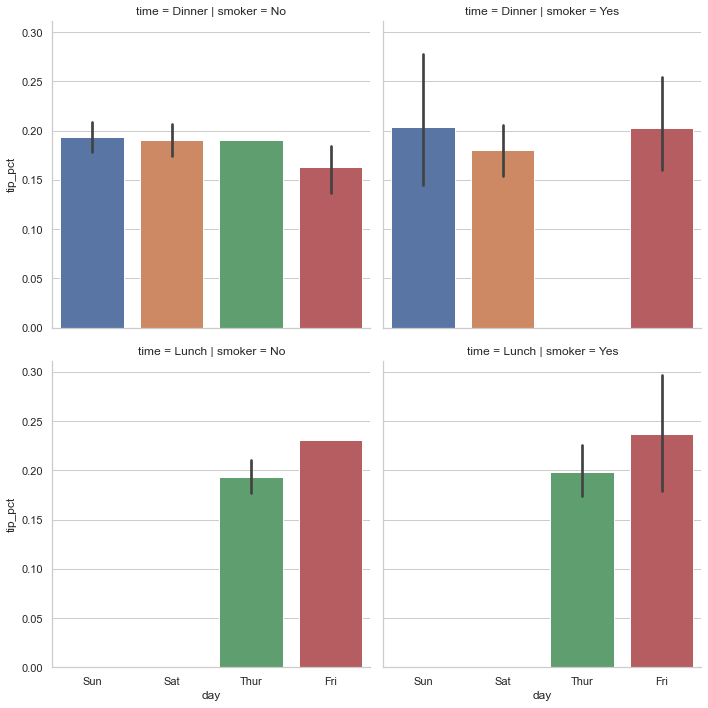

In [55]:
# 요일별 tip_pct, 시간, 흡연여부

sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

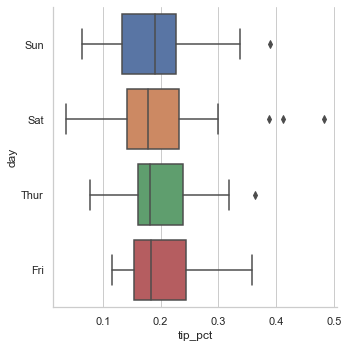

In [56]:
# boxplot - 중간값, 사분위, 특잇값

sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])